In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm, gaussian_kde
from scipy.optimize import curve_fit

# For inline plotting in Jupyter
%matplotlib inline

# Load the raw error arrays saved from the simulation
raw_stdv_s = np.load("stdv_s_clean.npy")
raw_stdv_e = np.load("stdv_e_clean.npy")


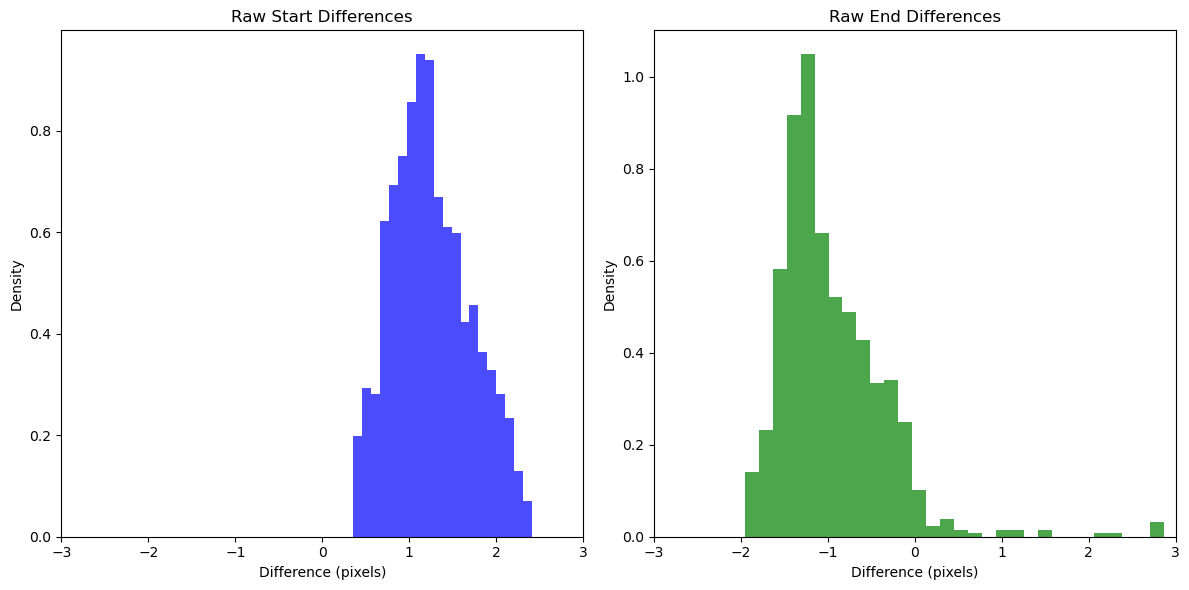

In [71]:
# %% Cell 2: Plot Raw Distributions

raw_stdv_s = raw_stdv_s[abs(raw_stdv_s) < 3]
raw_stdv_e = raw_stdv_e[abs(raw_stdv_e) < 3]
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(raw_stdv_s, bins=20, density=True, alpha=0.7, color='blue')
axes[0].set_title("Raw Start Differences")
axes[0].set_xlabel("Difference (pixels)")
axes[0].set_ylabel("Density")
axes[0].set_xlim(-3, 3)

axes[1].hist(raw_stdv_e, bins=30, density=True, alpha=0.7, color='green')
axes[1].set_title("Raw End Differences")
axes[1].set_xlabel("Difference (pixels)")
axes[1].set_ylabel("Density")
axes[1].set_xlim(-3, 3)

plt.tight_layout()
plt.show()


Standard Gaussian Fit (Start Differences):
A = 1.046, mu = 1.180, sigma = 0.499
RMSE = 0.0860

Standard Gaussian Fit (End Differences):
A = 1.003, mu = -1.148, sigma = 0.504
RMSE = 0.0937


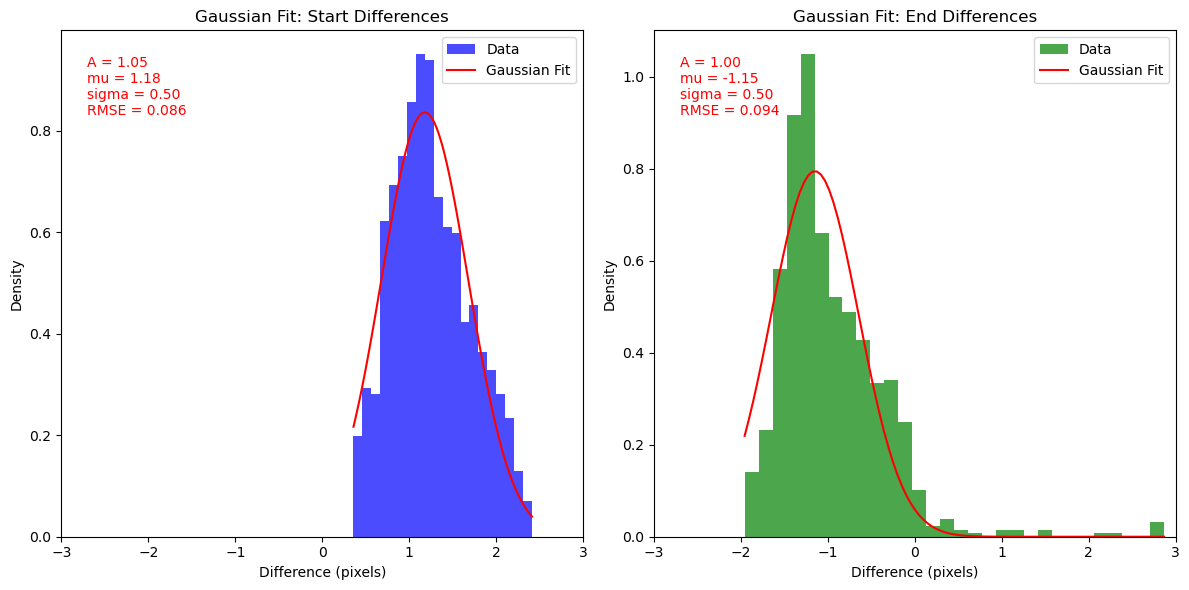

In [72]:
# %% Cell 3: Fit a Standard Gaussian to the Data

def gaussian(x, A, mu, sigma):
    """Standard Gaussian function."""
    return A * norm.pdf(x, mu, sigma)

# Compute histogram data for start differences
hist_s, bin_edges_s = np.histogram(raw_stdv_s, bins=20, density=True)
bin_centers_s = (bin_edges_s[:-1] + bin_edges_s[1:]) / 2

# Fit the Gaussian for start differences
popt_s, _ = curve_fit(gaussian, bin_centers_s, hist_s, 
                      p0=[1, np.mean(raw_stdv_s), np.std(raw_stdv_s)])
fit_s = gaussian(bin_centers_s, *popt_s)
rmse_s = np.sqrt(np.mean((fit_s - hist_s)**2))

# Print best fit parameters for start differences
print("Standard Gaussian Fit (Start Differences):")
print(f"A = {popt_s[0]:.3f}, mu = {popt_s[1]:.3f}, sigma = {popt_s[2]:.3f}")
print(f"RMSE = {rmse_s:.4f}")

# Compute histogram data for end differences
hist_e, bin_edges_e = np.histogram(raw_stdv_e, bins=20, density=True)
bin_centers_e = (bin_edges_e[:-1] + bin_edges_e[1:]) / 2

# Fit the Gaussian for end differences
popt_e, _ = curve_fit(gaussian, bin_centers_e, hist_e, 
                      p0=[1, np.mean(raw_stdv_e), np.std(raw_stdv_e)])
fit_e = gaussian(bin_centers_e, *popt_e)
rmse_e = np.sqrt(np.mean((fit_e - hist_e)**2))

# Print best fit parameters for end differences
print("\nStandard Gaussian Fit (End Differences):")
print(f"A = {popt_e[0]:.3f}, mu = {popt_e[1]:.3f}, sigma = {popt_e[2]:.3f}")
print(f"RMSE = {rmse_e:.4f}")

# Plot the histograms and the Gaussian fits
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
x_fit_s = np.linspace(bin_edges_s[0], bin_edges_s[-1], 100)
axes[0].hist(raw_stdv_s, bins=20, density=True, alpha=0.7, color='blue', label='Data')
axes[0].plot(x_fit_s, gaussian(x_fit_s, *popt_s), 'r-', label='Gaussian Fit')
axes[0].set_title("Gaussian Fit: Start Differences")
axes[0].set_xlabel("Difference (pixels)")
axes[0].set_ylabel("Density")
axes[0].legend()
axes[0].text(0.05, 0.95, f"A = {popt_s[0]:.2f}\nmu = {popt_s[1]:.2f}\nsigma = {popt_s[2]:.2f}\nRMSE = {rmse_s:.3f}",
             transform=axes[0].transAxes, verticalalignment='top', color='red')
axes[0].set_xlim(-3, 3)

x_fit_e = np.linspace(bin_edges_e[0], bin_edges_e[-1], 100)
axes[1].hist(raw_stdv_e, bins=30, density=True, alpha=0.7, color='green', label='Data')
axes[1].plot(x_fit_e, gaussian(x_fit_e, *popt_e), 'r-', label='Gaussian Fit')
axes[1].set_title("Gaussian Fit: End Differences")
axes[1].set_xlabel("Difference (pixels)")
axes[1].set_ylabel("Density")
axes[1].legend()
axes[1].text(0.05, 0.95, f"A = {popt_e[0]:.2f}\nmu = {popt_e[1]:.2f}\nsigma = {popt_e[2]:.2f}\nRMSE = {rmse_e:.3f}",
             transform=axes[1].transAxes, verticalalignment='top', color='red')
axes[1].set_xlim(-3, 3)

plt.tight_layout()
plt.savefig("gaussian_fit_clean.png")
plt.show()


Skewed Gaussian Fit (Start Differences):
A = 1.036, a_param = 2.789, mu = 0.704, sigma = 0.774
RMSE = 0.0617

Skewed Gaussian Fit (End Differences):
A = 0.972, a_param = 5.083, mu = -1.620, sigma = 0.798
RMSE = 0.0540


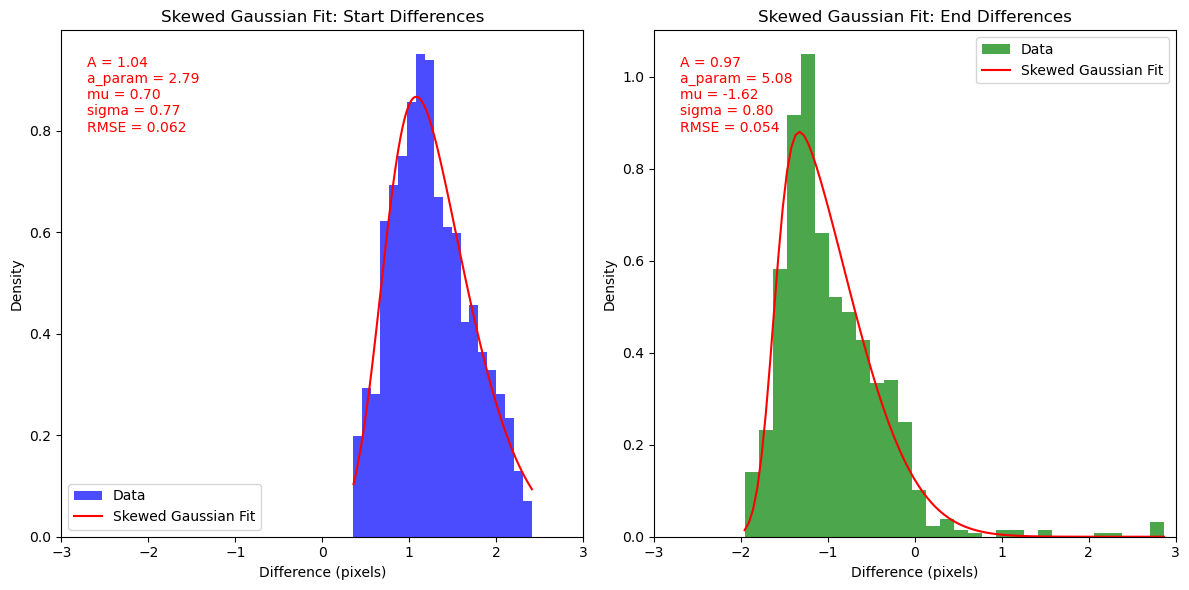

In [73]:
# %% Cell 4: Fit a Skewed Gaussian to the Data

def skewed_gaussian(x, A, a_param, mu, sigma):
    """Skewed Gaussian using scipy.stats.skewnorm."""
    return A * skewnorm.pdf(x, a_param, loc=mu, scale=sigma)

# Fit skewed Gaussian for start differences
popt_skew_s, _ = curve_fit(skewed_gaussian, bin_centers_s, hist_s, 
                           p0=[1, 0, np.mean(raw_stdv_s), np.std(raw_stdv_s)])
fit_skew_s = skewed_gaussian(bin_centers_s, *popt_skew_s)
rmse_skew_s = np.sqrt(np.mean((fit_skew_s - hist_s)**2))

# Print best fit parameters for skewed Gaussian (start differences)
print("Skewed Gaussian Fit (Start Differences):")
print(f"A = {popt_skew_s[0]:.3f}, a_param = {popt_skew_s[1]:.3f}, mu = {popt_skew_s[2]:.3f}, sigma = {popt_skew_s[3]:.3f}")
print(f"RMSE = {rmse_skew_s:.4f}")

# Fit skewed Gaussian for end differences
popt_skew_e, _ = curve_fit(skewed_gaussian, bin_centers_e, hist_e, 
                           p0=[1, 0, np.mean(raw_stdv_e), np.std(raw_stdv_e)])
fit_skew_e = skewed_gaussian(bin_centers_e, *popt_skew_e)
rmse_skew_e = np.sqrt(np.mean((fit_skew_e - hist_e)**2))

# Print best fit parameters for skewed Gaussian (end differences)
print("\nSkewed Gaussian Fit (End Differences):")
print(f"A = {popt_skew_e[0]:.3f}, a_param = {popt_skew_e[1]:.3f}, mu = {popt_skew_e[2]:.3f}, sigma = {popt_skew_e[3]:.3f}")
print(f"RMSE = {rmse_skew_e:.4f}")

# Plot the histograms and the skewed Gaussian fits
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
x_fit_s = np.linspace(bin_edges_s[0], bin_edges_s[-1], 100)
axes[0].hist(raw_stdv_s, bins=20, density=True, alpha=0.7, color='blue', label='Data')
axes[0].plot(x_fit_s, skewed_gaussian(x_fit_s, *popt_skew_s), 'r-', label='Skewed Gaussian Fit')
axes[0].set_title("Skewed Gaussian Fit: Start Differences")
axes[0].set_xlabel("Difference (pixels)")
axes[0].set_ylabel("Density")
axes[0].legend()
axes[0].text(0.05, 0.95, f"A = {popt_skew_s[0]:.2f}\na_param = {popt_skew_s[1]:.2f}\nmu = {popt_skew_s[2]:.2f}\nsigma = {popt_skew_s[3]:.2f}\nRMSE = {rmse_skew_s:.3f}",
             transform=axes[0].transAxes, verticalalignment='top', color='red')
axes[0].set_xlim(-3, 3)

x_fit_e = np.linspace(bin_edges_e[0], bin_edges_e[-1], 100)
axes[1].hist(raw_stdv_e, bins=30, density=True, alpha=0.7, color='green', label='Data')
axes[1].plot(x_fit_e, skewed_gaussian(x_fit_e, *popt_skew_e), 'r-', label='Skewed Gaussian Fit')
axes[1].set_title("Skewed Gaussian Fit: End Differences")
axes[1].set_xlabel("Difference (pixels)")
axes[1].set_ylabel("Density")
axes[1].legend()
axes[1].text(0.05, 0.95, f"A = {popt_skew_e[0]:.2f}\na_param = {popt_skew_e[1]:.2f}\nmu = {popt_skew_e[2]:.2f}\nsigma = {popt_skew_e[3]:.2f}\nRMSE = {rmse_skew_e:.3f}",
             transform=axes[1].transAxes, verticalalignment='top', color='red')
axes[1].set_xlim(-3, 3)

plt.tight_layout()
plt.savefig("skewed_gaussian_fit_clean.png")
plt.show()
